In [3]:
import warnings
import ast
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import pandas_profiling as pdp
warnings.filterwarnings('ignore')

In [4]:
# Read data and drop redundant column.
data = pd.read_csv('./dataset/final_dataset_with_odds.csv')
test = pd.read_csv('./dataset/with_odds_test.csv')

In [3]:
data.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,B365A,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA
0,0,2002-08-17,Blackburn,Sunderland,0,0,NH,0,0,0,...,4.333,1.8,3.1,3.8,1.615,3.25,5.00,1.66,3.3,4.50
1,1,2002-08-17,Charlton,Chelsea,2,3,NH,0,0,0,...,2.200,2.9,3.0,2.2,2.800,3.20,2.20,2.75,3.1,2.30
2,2,2002-08-17,Everton,Tottenham,2,2,NH,0,0,0,...,2.750,2.3,3.0,2.7,2.250,3.20,2.75,2.30,3.1,2.75
3,3,2002-08-17,Fulham,Bolton,4,1,H,0,0,0,...,4.333,1.8,3.1,3.8,1.833,3.20,3.75,1.72,3.2,4.33
4,4,2002-08-17,Leeds,Man City,3,0,H,0,0,0,...,4.500,1.7,3.2,4.2,1.615,3.50,4.50,1.66,3.3,4.50


In [8]:
data.dtypes

Unnamed: 0         int64
Date              object
HomeTeam          object
AwayTeam          object
FTHG               int64
FTAG               int64
FTR               object
HTGS               int64
ATGS               int64
HTGC               int64
ATGC               int64
HTP              float64
ATP              float64
HM1               object
HM2               object
HM3               object
HM4               object
HM5               object
AM1               object
AM2               object
AM3               object
AM4               object
AM5               object
HomeTeamLP       float64
AwayTeamLP       float64
MW               float64
HTFormPtsStr      object
ATFormPtsStr      object
HTFormPts          int64
ATFormPts          int64
HTWinStreak3       int64
HTWinStreak5       int64
HTLossStreak3      int64
HTLossStreak5      int64
ATWinStreak3       int64
ATWinStreak5       int64
ATLossStreak3      int64
ATLossStreak5      int64
HTGD             float64
ATGD             float64


<AxesSubplot:xlabel='FTR', ylabel='IWH'>

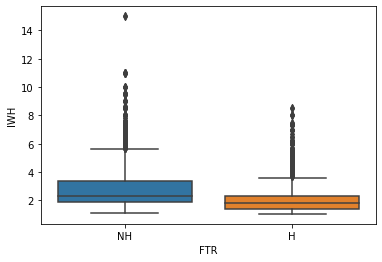

In [9]:
sns.boxplot(x='FTR', y="IWH", data=data)

In [5]:
col1 = ['FTR','HTGS', 'ATGS', 'HTGC', 'ATGC', 'HomeTeamLP', 'AwayTeamLP',
'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
'HTFormPts','ATFormPts',
'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP']

col2 = ['FTR','HTGS', 'ATGS', 'HTGC', 'ATGC', 'HomeTeamLP', 'AwayTeamLP',
'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
'HTFormPts','ATFormPts',
'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP','B365H','B365D','B365A','IWH','IWD','IWA','LBH','LBD','LBA','WHH','WHD','WHA']

col3 = ['FTR','B365H','B365D','B365A','IWH','IWD','IWA','LBH','LBD','LBA','WHH','WHD','WHA']

col4 = ['FTR','HTGS', 'ATGS', 'HTGC', 'ATGC', 'HomeTeamLP', 'AwayTeamLP',
'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP',
'HTFormPts','ATFormPts',        
'B365H','B365D','B365A','IWH','IWD','IWA','LBH','LBD','LBA','WHH','WHD','WHA']